In [1]:
import torch
from torch import nn

In [2]:
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [3]:
print(torch.__version__)
print(torchvision.__version__)

2.7.1+cu118
0.22.1+cu118


In [4]:
device="cpu"

In [5]:
#datasets from the pytorch(fashion)
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [6]:
len(train_data),len(test_data)

(60000, 10000)

In [7]:
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [8]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [10]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [11]:
image.shape,label

(torch.Size([1, 28, 28]), 9)

In [12]:
device="cuda"
torch.device(device)

device(type='cuda')

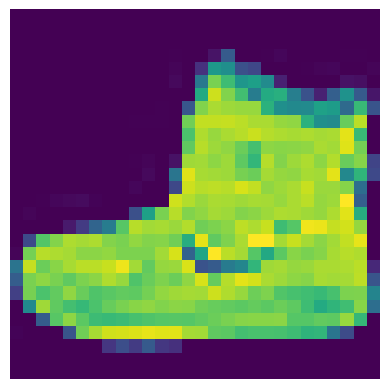

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(image.squeeze())
plt.axis('off')
plt.show()


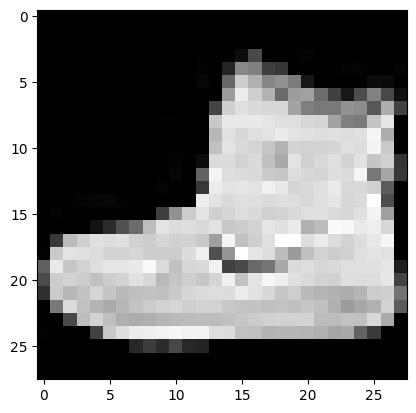

In [14]:
plt.imshow(image.squeeze(), cmap="gray")

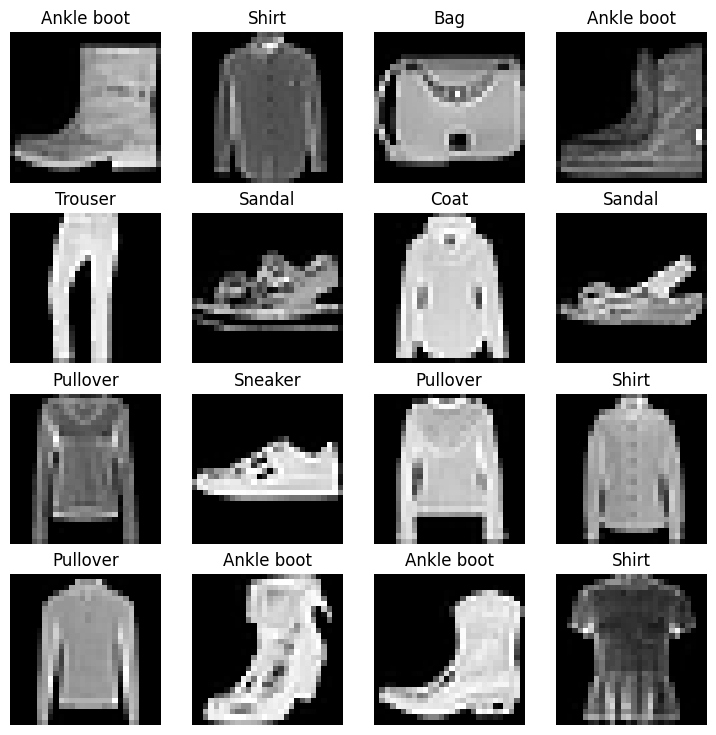

In [ ]:
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
    random_idx=torch.randint(0,len(train_data),size=[1]).item()
    img,label=train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)
    #helloworld

In [16]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [17]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)

In [18]:
test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                            shuffle=False)


In [19]:
train_dataloader,test_dataloader   

(<torch.utils.data.dataloader.DataLoader at 0x29ef063d3a0>,
 <torch.utils.data.dataloader.DataLoader at 0x29ef08cb710>)

In [20]:
print(len(train_dataloader),len(test_dataloader))

1875 313


In [21]:
len(train_data)/BATCH_SIZE

1875.0

In [22]:
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

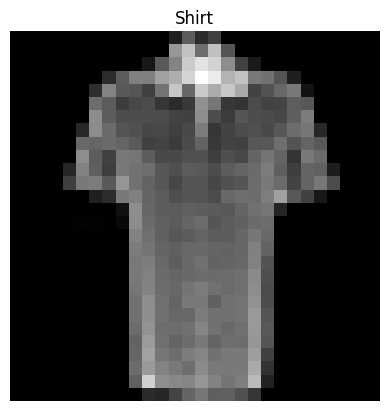

In [23]:
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch), size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)

In [24]:
flatten_model=nn.Flatten()
x=train_features_batch[0]
print(x)
print(x.shape)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078, 0.0000,
          0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000,

In [25]:
output=flatten_model(x)
print(output)
print(output.shape)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
         0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.2863, 0.0000, 0.0

In [26]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.Linear(in_features=hidden_units,out_features=output_shape)
        )
    def forward(self,x):
        return self.layer_stack(x)


In [27]:
torch.manual_seed(42)

model_0=FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [28]:
dummy_x=torch.randn(1,28,28)
print(model_0(dummy_x))
model_0(dummy_x).shape

tensor([[-0.2228,  0.1477,  0.3137, -0.3110, -0.3713,  0.0156,  0.4363,  0.1060,
         -0.1604, -0.4388]], grad_fn=<AddmmBackward0>)


torch.Size([1, 10])

In [29]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [30]:
from helper_functions import accuracy_fn

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1)

In [31]:
from timeit import default_timer as timer
def print_train_time(start:float,end:float,
                     device:torch.device=None):
    total_time=end-start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time


In [32]:
start_time=timer()


end_time=timer()
print_train_time(start=start_time, end=end_time, device="cpu")


Train time on cpu: 0.000 seconds


1.8999999156221747e-05

In [33]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu=timer()

epochs=3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    train_loss=0
    for batch,(X,y) in enumerate(train_dataloader):
        model_0.train()

        y_pred=model_0(X)

        loss=loss_fn(y_pred,y)
        train_loss+=loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch%400==0:
            print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")
    train_loss=train_loss/len(train_dataloader)

    test_loss,test_acc=0,0
    model_0.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            test_pred=model_0(X_test)
            test_loss+=loss_fn(test_pred,y_test)
            test_acc+=accuracy_fn(y_true=y_test,
                                  y_pred=test_pred.argmax(dim=1))
            
        test_loss/=len(test_dataloader)
        test_acc/=len(test_dataloader)
    
    print(f"Train loss: {train_loss:.5f} | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}")

train_time_end_on_cpu=timer()
total_train_time_cpu=print_train_time(start=train_time_start_on_cpu,
                                       end=train_time_end_on_cpu,
                                        device=str(next(model_0.parameters()).device))


C:\Users\Priyanshu\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 33%|███▎      | 1/3 [00:05<00:10,  5.16s/it]

Train loss: 0.59039 | Test loss: 0.50954 | Test acc: 82.04
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 67%|██████▋   | 2/3 [00:10<00:05,  5.14s/it]

Train loss: 0.47633 | Test loss: 0.47989 | Test acc: 83.20
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


100%|██████████| 3/3 [00:15<00:00,  5.16s/it]

Train loss: 0.45503 | Test loss: 0.47664 | Test acc: 83.43
Train time on cpu: 15.482 seconds


In [34]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               acurracy_fn):
    loss,acc=0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            y_pred=model(X)
            loss+=loss_fn(y_pred,y)
            acc+=accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))
        loss/=len(data_loader)
        acc/=len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}  




model_0_results=eval_model(model=model_0,
                           data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            acurracy_fn=accuracy_fn)

model_0_results

100%|██████████| 313/313 [00:00<00:00, 518.33it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [35]:
torch.cuda.is_available()

True

In [36]:
import torch
print(torch.version.cuda)        # Should not be None
print(torch.cuda.is_available()) # Should be True


11.8
True


In [37]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA version:", torch.version.cuda)
print("CUDA available:", torch.cuda.is_available())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")


PyTorch version: 2.7.1+cu118
CUDA version: 11.8
CUDA available: True
Device name: NVIDIA GeForce RTX 3050 6GB Laptop GPU


In [38]:
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [39]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.layer_stack=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_shape),
            nn.ReLU()
        )
    def forward(self,x: torch.Tensor):
        return self.layer_stack(x)

In [40]:
torch.manual_seed(42)
model_1=FashionMNISTModelV1(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
next(model_1.parameters()).device   

device(type='cuda', index=0)

In [41]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),
                           lr=0.1)
from helper_functions import accuracy_fn

In [42]:
#making a function to train the model
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
    train_loss,train_acc=0,0
    model.train()
    for batch,(X,y) in enumerate(train_dataloader):
        X,y=X.to(device),y.to(device)
        y_pred=model(X)
        loss=loss_fn(y_pred,y)
        train_loss+=loss
        train_acc+=accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss=train_loss/len(train_dataloader)
    train_acc=train_acc/len(train_dataloader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")
    return train_loss,train_acc

In [43]:
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device=device):
    test_loss,test_acc=0,0
    model.eval()
    with torch.inference_mode():
        for X_test,y_test in data_loader:
            X_test,y_test=X_test.to(device),y_test.to(device)
            test_pred=model(X_test)
            test_loss+=loss_fn(test_pred,y_test)
            test_acc+=accuracy_fn(y_true=y_test,
                                  y_pred=test_pred.argmax(dim=1))
        test_loss/=len(data_loader)
        test_acc/=len(data_loader) 
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")
    return test_loss,test_acc

In [44]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_gpu=timer()
epochs=3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----------------")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_1,
                data_loader=test_dataloader,
                loss_fn=loss_fn,
                accuracy_fn=accuracy_fn,
                device=device)

train_time_end_on_gpu=timer()
total_train_time_gpu=print_train_time(start=train_time_start_on_gpu,
                                       end=train_time_end_on_gpu,
                                        device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------------
Train loss: 1.09199 | Train acc: 61.34%


 33%|███▎      | 1/3 [00:06<00:12,  6.37s/it]

Test loss: 0.95636 | Test acc: 65.00%
Epoch: 1
----------------
Train loss: 0.78101 | Train acc: 71.93%


 67%|██████▋   | 2/3 [00:13<00:06,  6.71s/it]

Test loss: 0.72227 | Test acc: 73.91%
Epoch: 2
----------------
Train loss: 0.67027 | Train acc: 75.94%


100%|██████████| 3/3 [00:20<00:00,  6.79s/it]

Test loss: 0.68500 | Test acc: 75.02%
Train time on cuda: 20.381 seconds


In [45]:
total_train_time_cpu

15.481833600000755

In [46]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               acurracy_fn):
    loss,acc=0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            X,y=X.to(device),y.to(device)
            y_pred=model(X)
            loss+=loss_fn(y_pred,y)
            acc+=accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))
        loss/=len(data_loader)
        acc/=len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}  




model_1_results=eval_model(model=model_1,
                           data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            acurracy_fn=accuracy_fn)

model_1_results

100%|██████████| 313/313 [00:00<00:00, 410.98it/s]


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008368492126,
 'model_acc': 75.01996805111821}

In [47]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [48]:
#model_2(tinyvgg)
class FashionMNISTModelV2(nn.Module):
    def __init__(self,
                 input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.cnn_block_1=nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.cnn_block_2=nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=hidden_units)
        )
    def forward(self,x:torch.Tensor):
        x=self.cnn_block_1(x)
        # print(f"Shape after cnn_block_1: {x.shape}")
        x=self.cnn_block_2(x)
        # print(f"Shape after cnn_block_2: {x.shape}")
        x=self.classifier(x)
        # print(f"Shape after classifier: {x.shape}")
        return x

In [49]:
torch.manual_seed(42)
model_2=FashionMNISTModelV2(
    input_shape=1,  # 1 for grayscale images
    hidden_units=10,
    output_shape=len(class_names)
).to(device)
model_2

FashionMNISTModelV2(
  (cnn_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (cnn_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [50]:
torch.manual_seed(42)
rand_image_tensor=torch.rand(size=(1,28,28))
print(rand_image_tensor.shape)
print(rand_image_tensor.unsqueeze(0).shape)

torch.Size([1, 28, 28])
torch.Size([1, 1, 28, 28])


In [51]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0337, -0.0691,  0.0611, -0.0388, -0.0057,  0.0187, -0.0006, -0.0126,
          0.0253,  0.0020]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [52]:
next(model_2.parameters()).device

device(type='cuda', index=0)

In [53]:
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [54]:
#loss and optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.1)

In [55]:
model_2.state_dict()

OrderedDict([('cnn_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
       

In [56]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from timeit import default_timer as timer
train_time_start_on_gpu_model_2=timer()
epochs=3

for epoch in tqdm(range(epochs)):
    print(f"epoch: {epoch}\n----------------")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
train_time_end_on_gpu_model_2=timer()
total_train_time_gpu_model_2=print_train_time(start=train_time_start_on_gpu_model_2,
                                                 end=train_time_end_on_gpu_model_2,
                                                 device=device)



  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
----------------
Train loss: 0.60593 | Train acc: 78.08%


 33%|███▎      | 1/3 [00:09<00:18,  9.06s/it]

Test loss: 0.40087 | Test acc: 86.10%
epoch: 1
----------------
Train loss: 0.36152 | Train acc: 86.97%


 67%|██████▋   | 2/3 [00:18<00:09,  9.04s/it]

Test loss: 0.34262 | Test acc: 87.79%
epoch: 2
----------------
Train loss: 0.32250 | Train acc: 88.30%


100%|██████████| 3/3 [00:26<00:00,  8.99s/it]

Test loss: 0.32620 | Test acc: 88.09%
Train time on cuda: 26.959 seconds


In [57]:
#results
model_2_results=eval_model(model=model_2,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           acurracy_fn=accuracy_fn)
model_2_results

100%|██████████| 313/313 [00:00<00:00, 368.04it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32619544863700867,
 'model_acc': 88.08905750798722}

In [58]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [59]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008368492126,
 'model_acc': 75.01996805111821}

In [60]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32619544863700867,
 'model_acc': 88.08905750798722}

In [61]:
import pandas as pd
compare_results=pd.DataFrame([model_0_results,
                             model_1_results,
                             model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.326195,88.089058


In [62]:
compare_results["train_time"]= [total_train_time_cpu,
                                total_train_time_gpu,
                                total_train_time_gpu_model_2]
compare_results

,model_name,model_loss,model_acc,train_time
0,FashionMNISTModelV0,0.476639,83.426518,15.481834
1,FashionMNISTModelV1,0.685001,75.019968,20.380804
2,FashionMNISTModelV2,0.326195,88.089058,26.958730


Text(0.5, 0, 'Model')

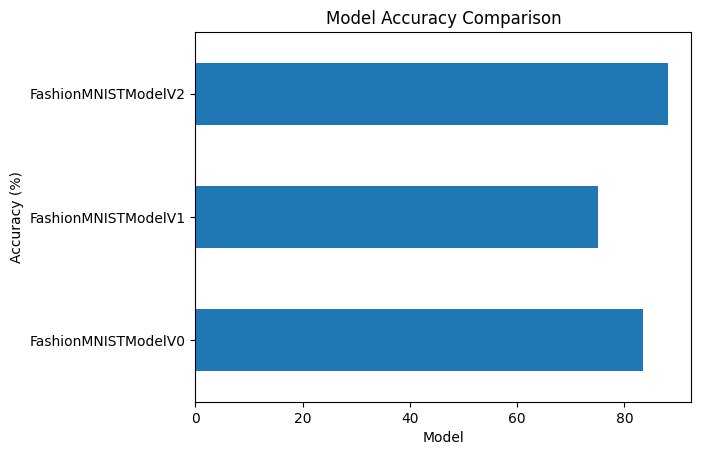

In [63]:
#visualizing
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.xlabel("Model")


Text(0.5, 0, 'Model')

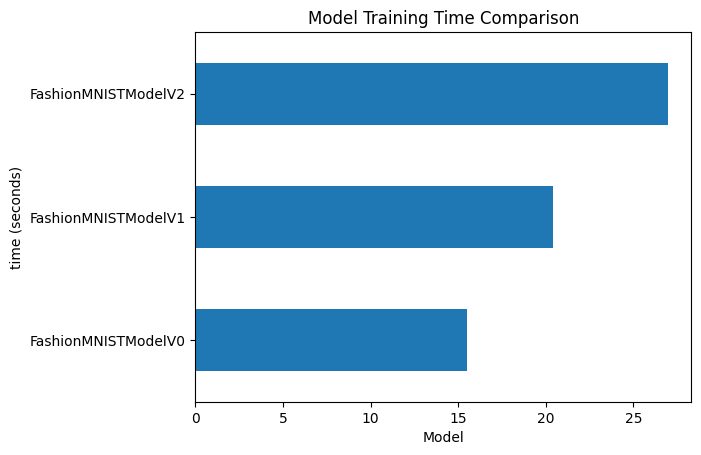

In [64]:
#visualizing
compare_results.set_index("model_name")["train_time"].plot(kind="barh")
plt.title("Model Training Time Comparison")
plt.ylabel("time (seconds)")
plt.xlabel("Model")


Text(0.5, 0, 'Model')

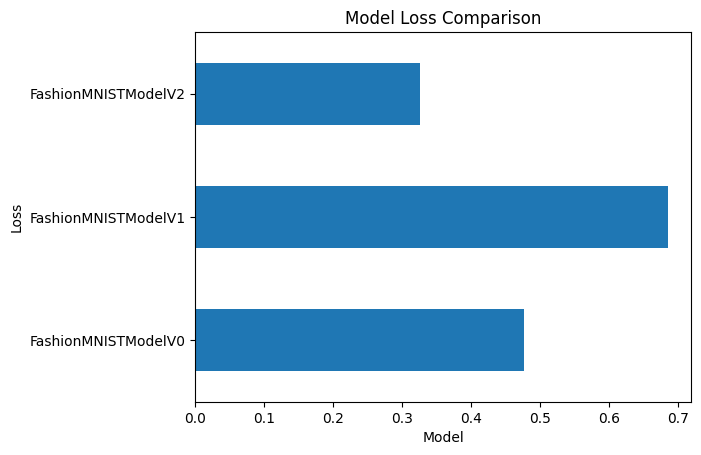

In [65]:
#visualizing
compare_results.set_index("model_name")["model_loss"].plot(kind="barh")
plt.title("Model Loss Comparison")
plt.ylabel("Loss")
plt.xlabel("Model")


In [ ]:
#make and evaluate random predictions
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):
    pred_probs=[]
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample=torch.unsqueeze(sample,dim=0).to(device)
            pred_logit=model(sample)
            pred_prob=torch.softmax(pred_logit,dim=1)
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)

In [161]:
import random
# random.seed(42)
test_samples=[]
test_labels=[]
for sample,label in random.sample(list(test_data),k=9):
    test_samples.append(sample)
    test_labels.append(label)
test_samples[0].shape
    

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Ankle boot')

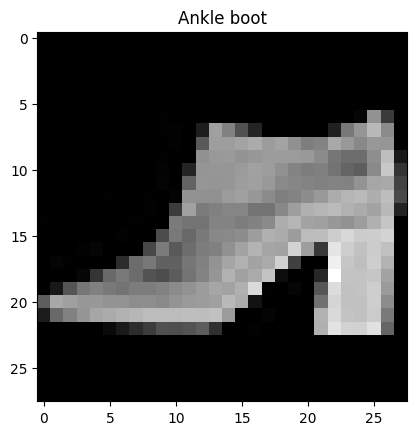

In [162]:

plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [163]:
pred_probs=make_predictions(model=model_2,
                            data=test_samples)
pred_probs.shape

Pred logit shape: torch.Size([1, 10])
Pred logit shape: torch.Size([1, 10])
Pred logit shape: torch.Size([1, 10])
Pred logit shape: torch.Size([1, 10])
Pred logit shape: torch.Size([1, 10])
Pred logit shape: torch.Size([1, 10])
Pred logit shape: torch.Size([1, 10])
Pred logit shape: torch.Size([1, 10])
Pred logit shape: torch.Size([1, 10])


torch.Size([9, 1, 10])

In [152]:
pred_probs

tensor([[[1.0070e-05, 2.8639e-07, 2.3587e-05, 4.0232e-06, 5.3372e-06,
          9.9958e-01, 1.8481e-05, 1.9460e-04, 1.1245e-04, 5.2752e-05]],

        [[3.6521e-03, 6.1705e-06, 4.1068e-02, 3.3151e-04, 2.8200e-02,
          1.8465e-06, 9.2669e-01, 1.8825e-06, 4.2174e-05, 1.1807e-06]],

        [[1.4778e-03, 1.4852e-04, 4.2802e-03, 3.7208e-04, 5.2216e-02,
          1.4192e-05, 9.4121e-01, 3.0190e-05, 2.0349e-04, 4.6383e-05]],

        [[2.0108e-03, 7.0111e-05, 1.3283e-02, 2.5596e-04, 4.9764e-01,
          9.0048e-07, 4.8513e-01, 2.4325e-06, 1.6004e-03, 8.8313e-06]],

        [[1.1444e-03, 3.9208e-04, 7.5382e-06, 9.9764e-01, 3.9456e-04,
          8.0656e-06, 1.6550e-05, 1.9833e-04, 1.3114e-04, 6.6677e-05]],

        [[1.9601e-02, 6.2179e-01, 4.7745e-03, 1.9033e-01, 4.0506e-02,
          7.8513e-03, 6.1847e-02, 2.7922e-03, 4.8779e-02, 1.7309e-03]],

        [[4.8804e-04, 2.3736e-04, 1.9034e-01, 7.3696e-04, 7.9147e-01,
          3.1368e-06, 1.6512e-02, 1.6324e-05, 1.5503e-04, 3.9309e-05]],


In [153]:
test_labels

[5, 6, 6, 4, 3, 1, 4, 6, 6]

In [154]:
pred_classes=pred_probs.argmax(dim=2)

In [155]:
pred_classes.squeeze()

tensor([5, 6, 6, 4, 3, 1, 4, 3, 6])

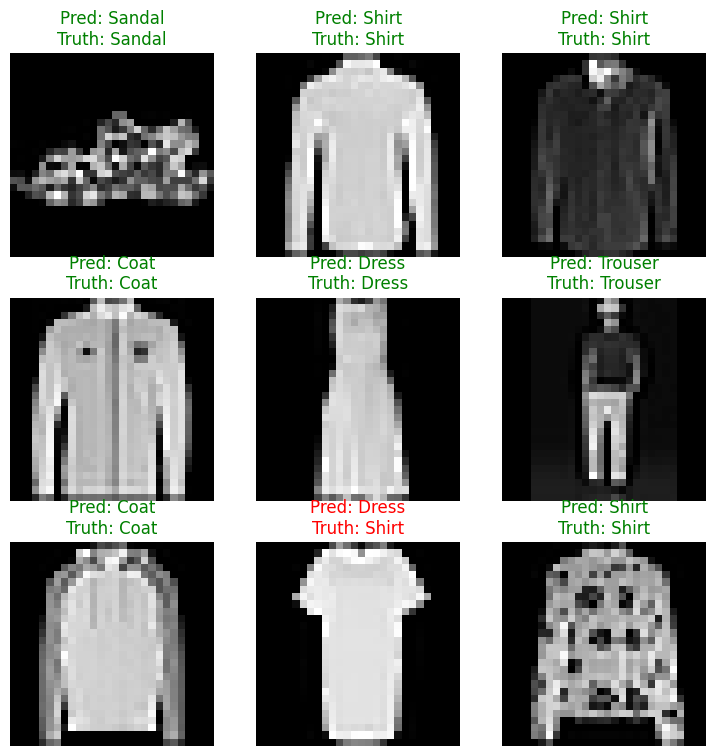

In [156]:
plt.figure(figsize=(9,9))
nrows,cols=3,3
for i , sample in enumerate(test_samples):
    plt.subplot(nrows,cols,i+1)
    plt.imshow(sample.squeeze(),cmap="gray")

    pred_label=class_names[pred_classes.squeeze()[i]]

    truth_label=class_names[test_labels[i]]
    title_text=f"Pred: {pred_label}\nTruth: {truth_label}"
    if pred_label==truth_label:
        plt.title(title_text, color="green")
    else:
        plt.title(title_text, color="red")
    plt.axis(False)

In [169]:
#predicting for the whole dataset
from tqdm.auto import tqdm
y_preds=[]
model_2.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader,desc="Making predictions..."):
        X,y=X.to(device),y.to(device)
        y_logits=model_2(X)
        y_pred=torch.softmax(y_logits.squeeze(),dim=0).argmax(dim=1)
        y_preds.append(y_pred.cpu())

# print(y_preds)
y_preds_tensor=torch.cat(y_preds)
y_preds_tensor

Making predictions...: 100%|██████████| 313/313 [00:00<00:00, 317.68it/s]


tensor([9, 2, 1,  ..., 8, 1, 2])

In [167]:
import torchmetrics
torchmetrics.__version__

'1.7.2'

In [168]:
import mlxtend
mlxtend.__version__

'0.23.4'

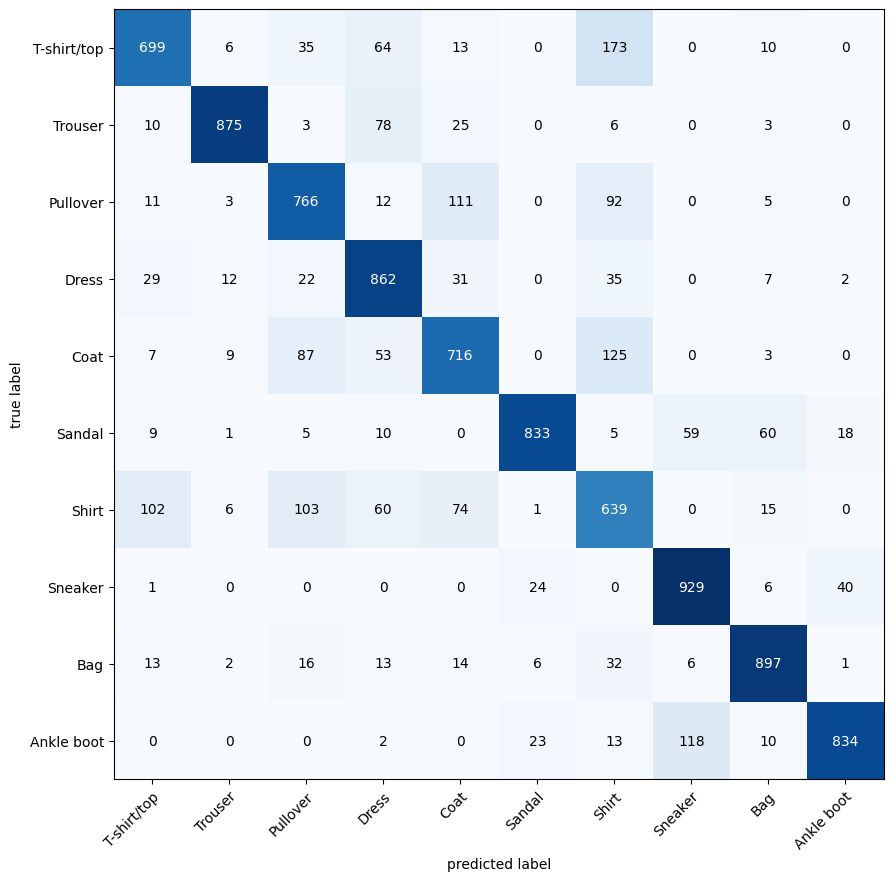

In [178]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat=ConfusionMatrix(num_classes=len(class_names),
                        task="multiclass")
confmat_tensor=confmat(preds=y_preds_tensor,
                       target=test_data.targets)

fig,ax=plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,10),
    cmap=plt.cm.Blues
)

In [172]:
confmat_tensor

tensor([[699,   6,  35,  64,  13,   0, 173,   0,  10,   0],
        [ 10, 875,   3,  78,  25,   0,   6,   0,   3,   0],
        [ 11,   3, 766,  12, 111,   0,  92,   0,   5,   0],
        [ 29,  12,  22, 862,  31,   0,  35,   0,   7,   2],
        [  7,   9,  87,  53, 716,   0, 125,   0,   3,   0],
        [  9,   1,   5,  10,   0, 833,   5,  59,  60,  18],
        [102,   6, 103,  60,  74,   1, 639,   0,  15,   0],
        [  1,   0,   0,   0,   0,  24,   0, 929,   6,  40],
        [ 13,   2,  16,  13,  14,   6,  32,   6, 897,   1],
        [  0,   0,   0,   2,   0,  23,  13, 118,  10, 834]])

In [179]:
#save and load model
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME="03_fashion_mnist_model_v2.pth"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: models\03_fashion_mnist_model_v2.pth


In [186]:
#create a new instance to load the state dict into it
torch.manual_seed(42)
loaded_model_2=FashionMNISTModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

#load in the state dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_2.to(device)

FashionMNISTModelV2(
  (cnn_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (cnn_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [187]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32619544863700867,
 'model_acc': 88.08905750798722}

In [188]:
#evaluate the loaded model
torch.manual_seed(42)
loaded_model_2_results=eval_model(model=loaded_model_2,
                                  data_loader=test_dataloader,
                                  loss_fn=loss_fn,
                                  acurracy_fn=accuracy_fn)
loaded_model_2_results

100%|██████████| 313/313 [00:00<00:00, 374.49it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32619544863700867,
 'model_acc': 88.08905750798722}

In [189]:
torch.isclose(
    torch.tensor(loaded_model_2_results["model_loss"]),
    torch.tensor(model_2_results["model_loss"])
)

tensor(True)

# excercise

In [1]:
!nvidia-smi

Thu Jun 12 20:36:19 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.83                 Driver Version: 572.83         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   49C    P8              6W /   75W |     534MiB /   6144MiB |     20%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import torch
print("PyTorch version:", torch.__version__)
device="cuda" if torch.cuda.is_available() else "cpu"
torch.device(device)
print(f"Using device: {device}")

PyTorch version: 2.7.1+cu118
Using device: cuda


In [5]:
import torchvision
from torchvision import datasets,transforms
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
    target_transform=None
)
test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
    target_transform=None
)

In [6]:
class_names=train_data.classes
class_to_idx=train_data.class_to_idx

Text(0.5, 1.0, 'Label: Ankle boot')

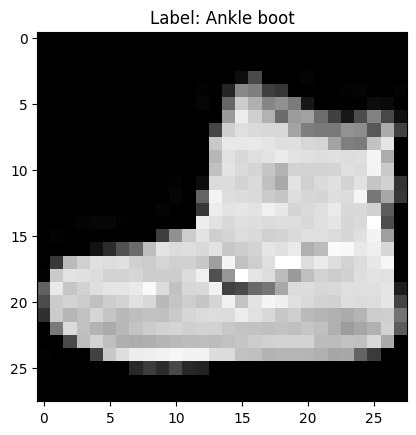

In [13]:
img0,label0=train_data[0]
import matplotlib.pyplot as plt
plt.imshow(img0.squeeze(),cmap="gray")
plt.title(f"Label: {class_names[label0]}")

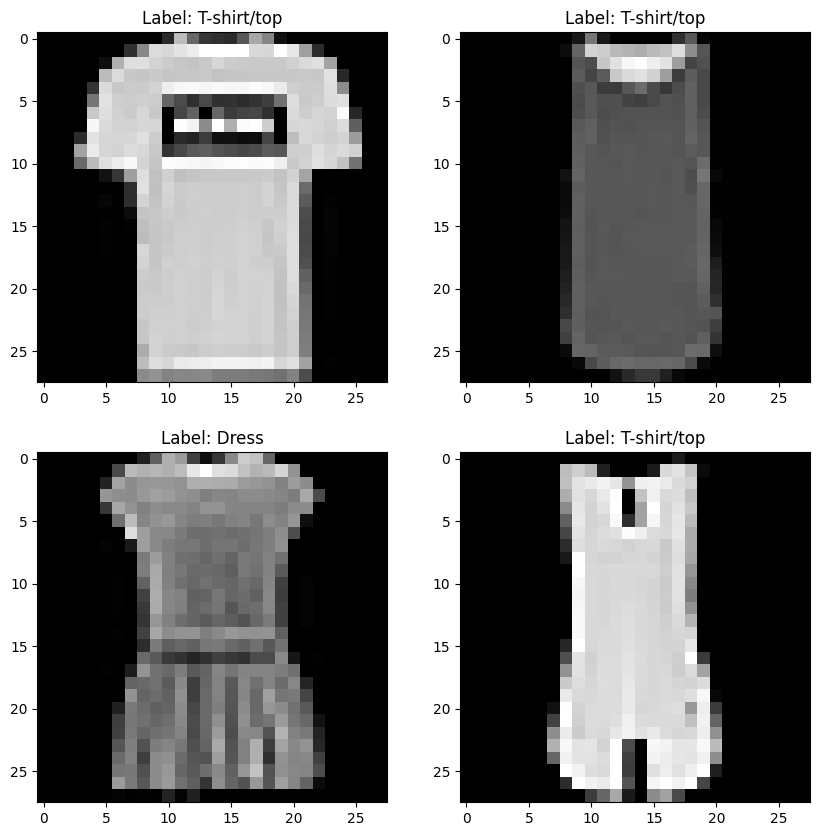

In [12]:
img1, label1 = train_data[1]
img2, label2 = train_data[2]
img3, label3 = train_data[3]
img4, label4 = train_data[4]
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.imshow(img1.squeeze(), cmap="gray")
plt.title(f"Label: {class_names[label1]}")
plt.subplot(2,2,2)
plt.imshow(img2.squeeze(), cmap="gray")
plt.title(f"Label: {class_names[label2]}")
plt.subplot(2,2,3)
plt.imshow(img3.squeeze(), cmap="gray")
plt.title(f"Label: {class_names[label3]}")
plt.subplot(2,2,4)
plt.imshow(img4.squeeze(), cmap="gray")
plt.title(f"Label: {class_names[label4]}")
plt.show()

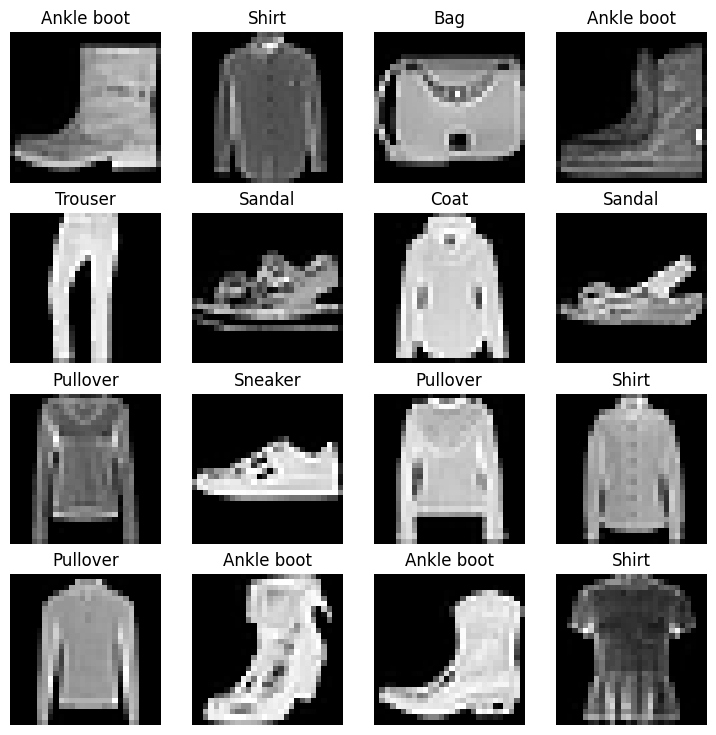

In [14]:
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
    random_idx=torch.randint(0,len(train_data),size=[1]).item()
    img,label=train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [16]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)

In [32]:
#model
from torch import nn
class FashionMNISTModelFinal(nn.Module):
    def __init__(self,
                input_shape:int,
                hidden_units:int,
                output_shape:int):
        super().__init__()
        self.cnn_block_1=nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.cnn_block_2=nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=output_shape,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=hidden_units)
        )
    def forward(self,x:torch.Tensor):
        x=self.cnn_block_1(x)
        x=self.cnn_block_2(x)
        x=self.classifier(x)
        return x


In [33]:
Final_model=FashionMNISTModelFinal(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)
Final_model

FashionMNISTModelFinal(
  (cnn_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (cnn_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [34]:
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=Final_model.parameters(),
                          lr=0.1)

In [35]:
#train_step
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
    train_loss,train_acc=0,0
    model.train()
    for batch,(X,y) in enumerate(train_dataloader):
        X,y=X.to(device),y.to(device)
        y_pred=model(X)
        loss=loss_fn(y_pred,y)
        train_loss+=loss
        train_acc+=accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss=train_loss/len(data_loader)
    train_acc/=len(data_loader)
    print(f"Train loss:{train_loss:.5f} | Train acc: {train_acc:.2f}%")
    return train_loss,train_acc




#test_step
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device=device):
    test_loss,test_acc=0,0
    model.eval()
    with torch.inference_mode():
        for X_test,y_test in data_loader:
            X_test,y_test=X_test.to(device),y_test.to(device)
            test_pred=model(X_test)
            test_loss+=loss_fn(test_pred,y_test)
            test_acc+=accuracy_fn(y_true=y_test,
                                  y_pred=test_pred.argmax(dim=1))
        test_loss/=len(data_loader)
        test_acc/=len(data_loader) 
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")
    return test_loss,test_acc


#evaluate model step
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               acurracy_fn):
    loss,acc=0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            X,y=X.to(device),y.to(device)
            y_pred=model(X)
            loss+=loss_fn(y_pred,y)
            acc+=accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))
        loss/=len(data_loader)
        acc/=len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}  

#for training time 
from timeit import default_timer as timer
def print_train_time(start:float,end:float,
                     device:torch.device=None):
    total_time=end-start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [36]:
#train on gpu
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from timeit import default_timer as Timer
import tqdm
train_time_start_on_gpu_final=timer()
epochs=5
for epoch in tqdm.tqdm(range(epochs)):
    print(f"Epochs: {epoch}\n----------------")
    train_step(model=Final_model,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=Final_model,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
train_time_end_on_gpu_final=timer()
total_train_time_gpu_final=print_train_time(start=train_time_start_on_gpu_final,
                                            end=train_time_end_on_gpu_final,
                                            device=str(next(Final_model.parameters()).device))


  0%|          | 0/5 [00:00<?, ?it/s]

Epochs: 0
----------------
Train loss:0.65348 | Train acc: 76.35%


 20%|██        | 1/5 [00:08<00:32,  8.03s/it]

Test loss: 0.38742 | Test acc: 86.70%
Epochs: 1
----------------
Train loss:0.35774 | Train acc: 87.07%


 40%|████      | 2/5 [00:15<00:23,  7.71s/it]

Test loss: 0.34605 | Test acc: 87.75%
Epochs: 2
----------------
Train loss:0.31871 | Train acc: 88.47%


 60%|██████    | 3/5 [00:22<00:15,  7.57s/it]

Test loss: 0.32436 | Test acc: 88.76%
Epochs: 3
----------------
Train loss:0.29757 | Train acc: 89.22%


 80%|████████  | 4/5 [00:30<00:07,  7.58s/it]

Test loss: 0.35187 | Test acc: 87.27%
Epochs: 4
----------------
Train loss:0.28324 | Train acc: 89.67%


100%|██████████| 5/5 [00:38<00:00,  7.65s/it]

Test loss: 0.29735 | Test acc: 89.45%
Train time on cuda:0: 38.262 seconds


In [41]:
#train on the cpu
# Set device to CPU
device = "cpu"
Final_model_cpu=FashionMNISTModelFinal(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

# Re-initialize optimizer for CPU parameters
optimizer = torch.optim.SGD(params=Final_model_cpu.parameters(),
                            lr=0.1)

# Train on CPU
torch.manual_seed(42)
train_time_start_on_cpu_final = timer()
epochs = 5
for epoch in tqdm.tqdm(range(epochs)):
    print(f"Epochs: {epoch}\n----------------")
    train_step(model=Final_model_cpu,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=Final_model_cpu,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
train_time_end_on_cpu_final = timer()
total_train_time_cpu_final = print_train_time(start=train_time_start_on_cpu_final,
                                              end=train_time_end_on_cpu_final,
                                              device=str(next(Final_model.parameters()).device))

  0%|          | 0/5 [00:00<?, ?it/s]

Epochs: 0
----------------
Train loss:0.64470 | Train acc: 76.49%


 20%|██        | 1/5 [00:19<01:16, 19.02s/it]

Test loss: 0.38373 | Test acc: 86.22%
Epochs: 1
----------------
Train loss:0.35706 | Train acc: 87.15%


 40%|████      | 2/5 [00:37<00:56, 18.82s/it]

Test loss: 0.35082 | Test acc: 87.26%
Epochs: 2
----------------
Train loss:0.31913 | Train acc: 88.40%


 60%|██████    | 3/5 [00:56<00:37, 18.73s/it]

Test loss: 0.33103 | Test acc: 87.63%
Epochs: 3
----------------
Train loss:0.29996 | Train acc: 89.04%


 80%|████████  | 4/5 [01:15<00:18, 18.72s/it]

Test loss: 0.33001 | Test acc: 87.87%
Epochs: 4
----------------
Train loss:0.28876 | Train acc: 89.41%


100%|██████████| 5/5 [01:33<00:00, 18.79s/it]

Test loss: 0.31348 | Test acc: 88.82%
Train time on cpu: 93.949 seconds


In [42]:
#make and evaluate random predictions
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):
    pred_probs=[]
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample=torch.unsqueeze(sample,dim=0).to(device)
            pred_logit=model(sample)
            pred_prob=torch.softmax(pred_logit,dim=1)
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)

In [43]:
import random
random.seed(42)
test_samples=[]
test_labels=[]
for sample,label in random.sample(list(test_data),k=9):
    test_samples.append(sample)
    test_labels.append(label)
test_samples[0].shape

torch.Size([1, 28, 28])

In [45]:
pred_probs=make_predictions(model=Final_model,
                            data=test_samples)
pred_probs.shape

torch.Size([9, 1, 10])

In [46]:
pred_classes=pred_probs.argmax(dim=2)

In [49]:
pred_classes.squeeze()

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

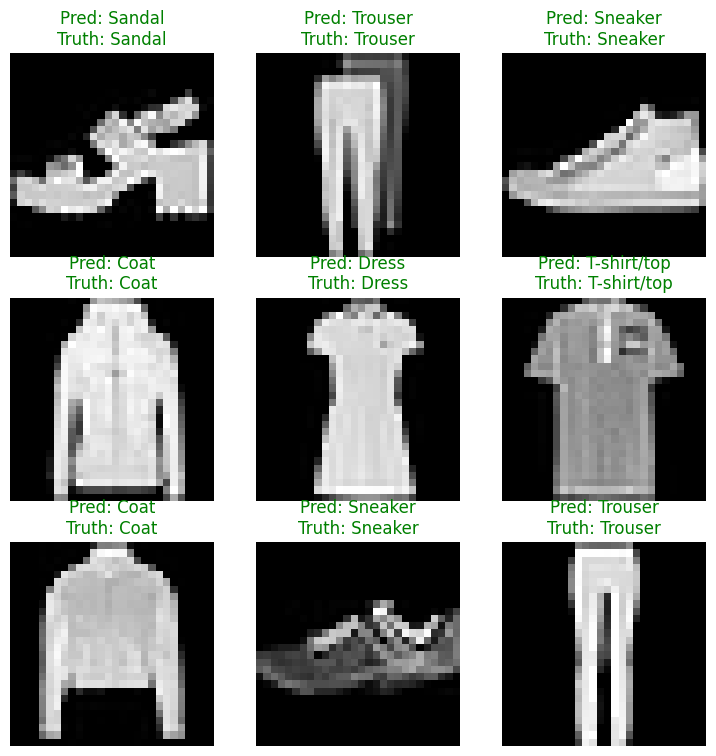

In [50]:
plt.figure(figsize=(9,9))
nrows,cols=3,3
for i , sample in enumerate(test_samples):
    plt.subplot(nrows,cols,i+1)
    plt.imshow(sample.squeeze(),cmap="gray")

    pred_label=class_names[pred_classes.squeeze()[i]]

    truth_label=class_names[test_labels[i]]
    title_text=f"Pred: {pred_label}\nTruth: {truth_label}"
    if pred_label==truth_label:
        plt.title(title_text, color="green")
    else:
        plt.title(title_text, color="red")
    plt.axis(False)

In [53]:
device="cpu"
#predicting for the whole dataset
from tqdm.auto import tqdm
y_preds=[]
Final_model.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader,desc="Making predictions..."):
        X,y=X.to(device),y.to(device)
        y_logits=Final_model(X)
        y_pred=torch.softmax(y_logits.squeeze(),dim=0).argmax(dim=1)
        y_preds.append(y_pred.cpu())

# print(y_preds)
y_preds_tensor=torch.cat(y_preds)
y_preds_tensor

Making predictions...: 100%|██████████| 313/313 [00:01<00:00, 245.89it/s]


tensor([9, 2, 1,  ..., 8, 1, 0])

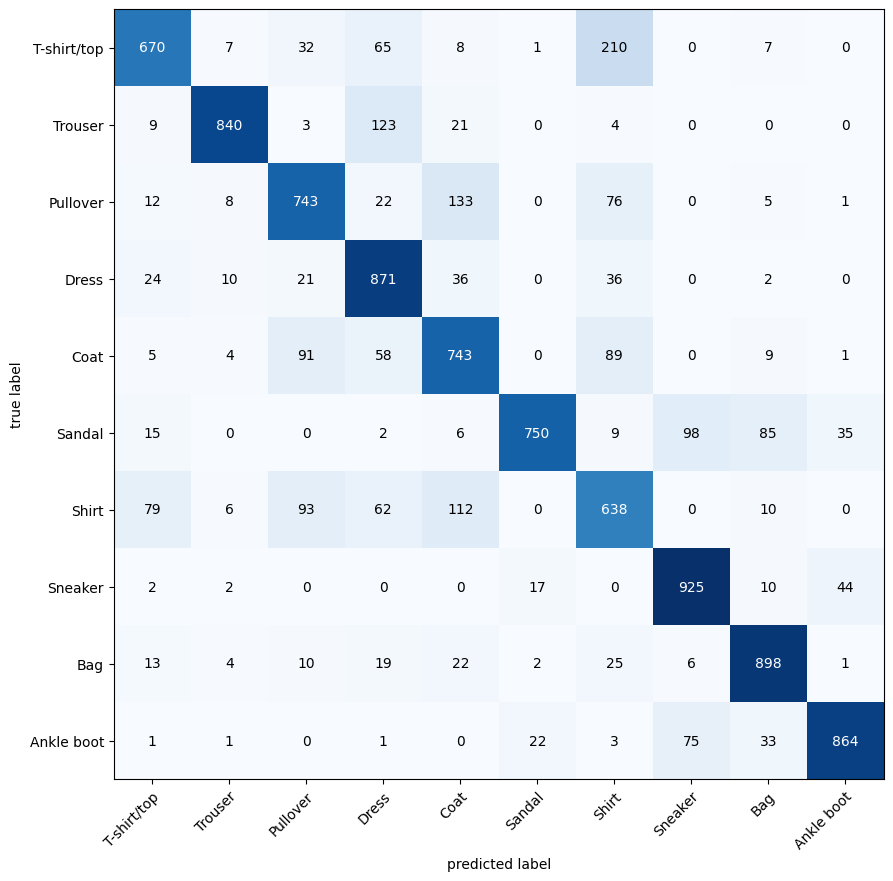

In [54]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat=ConfusionMatrix(num_classes=len(class_names),
                        task="multiclass")
confmat_tensor=confmat(preds=y_preds_tensor,
                       target=test_data.targets)

fig,ax=plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,10),
    cmap=plt.cm.Blues
)

In [58]:
a=torch.rand(1,3,64,64)
a.shape

torch.Size([1, 3, 64, 64])

In [60]:
conv_layer=nn.Conv2d(
    in_channels=3,
    out_channels=4,
    kernel_size=4,
    stride=2,
    padding=1
)
output=conv_layer(a)
output.shape

torch.Size([1, 4, 32, 32])

In [61]:
final_model_result_gpu=eval_model(
    model=Final_model,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    acurracy_fn=accuracy_fn
)
final_model_result_gpu

100%|██████████| 313/313 [00:01<00:00, 211.57it/s]


{'model_name': 'FashionMNISTModelFinal',
 'model_loss': 0.2985808253288269,
 'model_acc': 89.26717252396166}

In [63]:
final_model_result_cpu=eval_model(
    model=Final_model_cpu,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    acurracy_fn=accuracy_fn
)
final_model_result_cpu

100%|██████████| 313/313 [00:01<00:00, 228.80it/s]


{'model_name': 'FashionMNISTModelFinal',
 'model_loss': 0.3134803771972656,
 'model_acc': 88.81789137380191}

In [65]:
import pandas as pd
compare_results_cg=pd.DataFrame([final_model_result_cpu,
                            final_model_result_gpu])
compare_results_cg

,model_name,model_loss,model_acc
0,FashionMNISTModelFinal,0.313480,88.817891
1,FashionMNISTModelFinal,0.298581,89.267173


In [67]:
compare_results_cg["train_time"]=[total_train_time_cpu_final,
                                  total_train_time_gpu_final]
compare_results_cg

,model_name,model_loss,model_acc,train_time
0,FashionMNISTModelFinal,0.313480,88.817891,93.948881
1,FashionMNISTModelFinal,0.298581,89.267173,38.261841


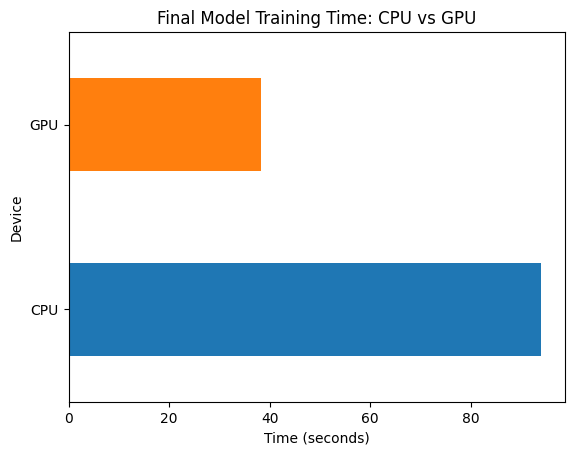

In [71]:
ax = compare_results_cg["train_time"].plot(kind="barh", color=["#1f77b4", "#ff7f0e"])
plt.title("Final Model Training Time: CPU vs GPU")
plt.xlabel("Time (seconds)")
plt.ylabel("Device")
ax.set_yticks([0, 1])
ax.set_yticklabels(["CPU", "GPU"])
plt.show()